# Dask Array

Материалы:
* Макрушин С.В. Лекция 11: Dask
* https://docs.dask.org/en/latest/array.html
* JESSE C. DANIEL. Data Science with Python and Dask. 

## Задачи для совместного разбора

In [1]:
import dask.array as da
import dask.dataframe
import h5py
import numpy as np
# import pygraphviz

1. Создайте массив размерностью 1000 на 300000, заполненный числами из стандартного нормального распределения. Исследуйте основные характеристики полученного массива.

In [2]:
%%time
arr_da = da.random.normal(0, 1, size=(10000, 300_000), chunks=(1000, 30_000))
arr_da

Wall time: 4.96 ms


dask.array<normal, shape=(10000, 300000), dtype=float64, chunksize=(1000, 30000), chunktype=numpy.ndarray>

2. Посчитайте сумму квадратов элементов массива, созданного в задаче 1. Создайте массив `np.array` такого же размера и сравните скорость решения задачи с использование `da.array` и `np.array`

In [85]:
%%time
np.power(arr_da, 2).sum().compute()

Wall time: 1min 11s


2999994618.8570037

In [9]:
%%time
da.power(arr_da, 2).sum().compute()

Wall time: 8.32 s


300033717.4435707

3. Визуализируйте граф вычислений для задачи 2.

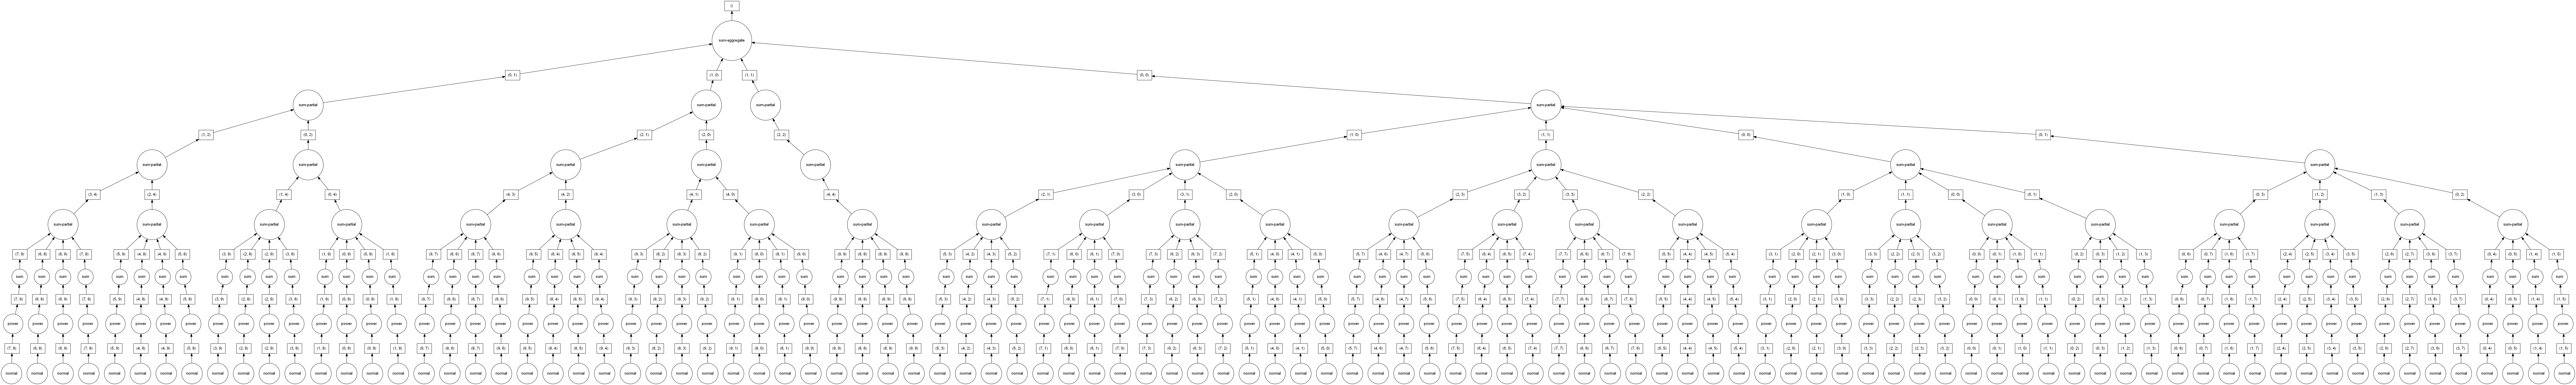

In [3]:
da.power(arr_da, 2).sum().visualize()

## Лабораторная работа 11

In [1]:
import dask.array as da
import h5py
import numpy as np

1. Считайте датасет `recipe` из файла `minutes_n_ingredients_full.hdf5` в виде `dask.array`. Укажите аргумент `chunks=(100_000, 3)` при создании массива. Выведите на экран основную информацию о массиве.

In [3]:
with h5py.File("11_dask_array_data/minutes_n_ingredients_full.hdf5", "r") as hdf:
	data = hdf.get('recipe')
	data = da.from_array(data, chunks=(100_000, 3))
	print(data)

dask.array<array, shape=(2231637, 3), dtype=int64, chunksize=(100000, 3), chunktype=numpy.ndarray>


In [4]:
data

dask.array<array, shape=(2231637, 3), dtype=int64, chunksize=(100000, 3), chunktype=numpy.ndarray>

2. Вычислите среднее значение по каждому столбцу, кроме первого. 

In [24]:
data.compute()

array([[ 683970,      33,       9],
       [1089012,      23,       5],
       [1428572,       0,       5],
       ...,
       [1910650,      60,       2],
       [ 713836,       0,       9],
       [ 660699,      64,       8]], dtype=int64)

In [27]:
data[:, 1].mean().compute()

1004.2080517575215

In [28]:
data[:, 2].mean().compute()

5.419800800936711

3. Исследуйте, как влияет значение аргумента `chunks` при создании `dask.array` на скорость выполнения операции поиска среднего. 

In [48]:
%%time
data[:, 1].mean().compute()

Wall time: 11.4 ms


1004.2080517575215

In [49]:
%%time
data[:, 2].mean().compute()

Wall time: 10.9 ms


5.419800800936711

In [50]:
with h5py.File("11_dask_array_data/minutes_n_ingredients_full.hdf5", "r") as hdf:
	data = hdf.get('recipe')
	data = np.asarray(data)
	data = da.asarray(data, chunks=(1_000, 3))
	# print(data)

In [51]:
%%time
data[:, 1].mean().compute()

Wall time: 328 ms


1004.2080517575215

In [52]:
%%time
data[:, 2].mean().compute()

Wall time: 322 ms


5.419800800936711

4. Выберите рецепты, время выполнения которых меньше медианного значения

In [71]:
da.median(data[:, 1], axis=0).compute()

32.0

In [70]:
(data[data[:, 1] < da.median(data[:, 1], axis=0)]).compute()

array([[1089012,      23,       5],
       [1428572,       0,       5],
       [1400250,      24,       1],
       ...,
       [1029131,      19,       4],
       [1700703,       1,       1],
       [ 713836,       0,       9]], dtype=int64)

5. Посчитайте количество каждого из возможных значений кол-ва ингредиентов

In [156]:

[i.compute() for i in da.unique(data[:, 2], return_counts=True)]

[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 43], dtype=int64),
 array([222071, 224158, 229388, 234948, 240720, 244360, 247181, 246747,
        246816,  22430,  19094,  15165,  11640,   8284,   6014,   4145,
          2793,   1913,   1279,    852,    529,    346,    244,    178,
           107,     68,     55,     33,     22,     20,     13,      5,
             4,      3,      4,      1,      2,      1,      1,      2,
             1], dtype=int64)]

In [160]:
unique, counts = np.unique(data[:, 2], return_counts=True)
dict(zip(unique.compute(), counts.compute()))

{1: 222071,
 2: 224158,
 3: 229388,
 4: 234948,
 5: 240720,
 6: 244360,
 7: 247181,
 8: 246747,
 9: 246816,
 10: 22430,
 11: 19094,
 12: 15165,
 13: 11640,
 14: 8284,
 15: 6014,
 16: 4145,
 17: 2793,
 18: 1913,
 19: 1279,
 20: 852,
 21: 529,
 22: 346,
 23: 244,
 24: 178,
 25: 107,
 26: 68,
 27: 55,
 28: 33,
 29: 22,
 30: 20,
 31: 13,
 32: 5,
 33: 4,
 34: 3,
 35: 4,
 36: 1,
 37: 2,
 38: 1,
 39: 1,
 40: 2,
 43: 1}

6. Найдите максимальную продолжительность рецепта. Ограничьте максимальную продолжительность рецептов сверху значением, равному 75% квантилю.

In [117]:
np.quantile(data[:, 1], 0.75)

f:\programming\python\bigdatapt-bdpt-\venv39\lib\site-packages\dask\array\core.py:1553: FutureWarning: The `numpy.quantile` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  warnings.warn(


49.0

In [116]:
da.argmax(data[:, 1]).compute()

1048492

In [132]:
(data[:, 1][data[:, 1] <= np.quantile(data[:, 1], 0.75)]).compute()

f:\programming\python\bigdatapt-bdpt-\venv39\lib\site-packages\dask\array\core.py:1553: FutureWarning: The `numpy.quantile` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  warnings.warn(


array([33, 23,  0, ..., 19,  1,  0], dtype=int64)

7. Создайте массив `dask.array` из 2 чисел, содержащих ваши предпочтения относительно времени выполнения рецепта и кол-ва ингредиентов. Найдите наиболее похожий (в смысле $L_1$) рецепт из имеющихся в датасете.

In [137]:
my_daarray = da.asarray(np.array([100, 10]).reshape(1, 2))

In [138]:
my_daarray.compute()

array([[100,  10]])

In [150]:
similarity = np.sqrt(np.sum((data[:, 1:3] / data[:, 1:3].sum(axis=1)[:, np.newaxis] - my_daarray / np.sum(my_daarray))**2, axis=1))
similarity[np.isnan(similarity)] = similarity[0]+1

result = data[:, 1:3][similarity.argmin()]
result.compute().reshape(1, 2)

array([[60,  6]], dtype=int64)

8. Работая с исходным файлом в формате `hdf5`, реализуйте алгоритм подсчета среднего значения в блочной форме и вычислите с его помощью среднее значение второго столбца в массиве.

Блочный алгоритм вычислений состоит из двух частей:
1. загрузка фрагмента за фрагментом данных по `blocksize` элементов и проведение вычислений на этим фрагментом;
2. агрегация результатов вычислений на различных фрагментах для получения результата на уровне всего набора данных.

Важно: при работе с `h5py` в память загружаются не все элементы, а только те, которые запрашиваются в данный момент

In [45]:
f = h5py.File("11_dask_array_data/minutes_n_ingredients_full.hdf5", "r")
rec = f["recipe"][:, 1]

In [46]:
arr_len = rec.shape[0]
arr_len

2231637

In [47]:
blocksize = 150_000

In [59]:
import math

iter_num = math.ceil(arr_len / blocksize)

In [82]:
list_of_means = []

for i in range(0, arr_len, blocksize):
	data = np.asarray(rec[i: i +blocksize])
	data = da.asarray(data)
	list_of_means.append(da.mean(data).compute())

list_of_means

[39.948566666666665,
 45.17384,
 41.082073333333334,
 39.46669333333333,
 40.22546666666667,
 39.533,
 14358.19802,
 42.67669333333333,
 39.20897333333333,
 42.73339333333333,
 43.737786666666665,
 40.25944666666667,
 42.21693333333333,
 42.5815,
 49.16160350053556]

In [85]:
sum(list_of_means) / len(list_of_means)

996.4135993444802

In [ ]:
f.close()